# **Bankruptcy prediction with XGboost in Python**

This exercise is about predicting if a company would be going bankrupt in the future. Given a training dataset our goal is to predict if a company will be going bankrupt.

## **The Dataset**

The dataset that will be used during this exercise is named `train.csv` and contains financial information about companies that have gone bankrupt and others that have not. The dataset can be found in [Kaggle - The 3rd Annual International Data Science & AI Competition 2022](https://www.kaggle.com/competitions/company-bankruptcy-prediction/overview) and was provided by Sebastian Tomczak professor of the Department of Operations Research at Wrocław University of Science and Technology in Poland.

### **Information about our Data**

The dataset contains **67 columns**:

_For binary variables: `1` = true and `0` = false._

- `class` <b> is the target variable </b> with values 0 (no bankruptcy) and 1

- `id`
- `forecasting period`
- `net profit / total assets`
- `total liabilities / total assets`
- `working capital / total assets`
- `current assets / short-term liabilities`
- `(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365`
- `retained earnings / total assets`
- `EBIT / total assets`
- `book value of equity / total liabilities`
- `sales / total assets`
- `equity / total assets`
- `(gross profit + extraordinary items + financial expenses) / total assets`
- `gross profit / short-term liabilities`
- `(gross profit + depreciation) / sales`
- `(gross profit + interest) / total assets`
- `(total liabilities * 365) / (gross profit + depreciation)`
- `(gross profit + depreciation) / total liabilities`
- `total assets / total liabilities`
- `gross profit / total assets`
- `gross profit / sales`
- `(inventory * 365) / sales`
- `sales (n) / sales (n-1)`
- `profit on operating activities / total assets`
- `net profit / sales`
- `gross profit (in 3 years) / total assets`
- `(equity - share capital) / total assets`
- `(net profit + depreciation) / total liabilities`
- `profit on operating activities / financial expenses`
- `working capital / fixed assets`
- `logarithm of total assets`
- `(total liabilities - cash) / sales`
- `(gross profit + interest) / sales`
- `(current liabilities * 365) / cost of products sold`
- `operating expenses / short-term liabilities`
- `operating expenses / total liabilities`
- `profit on sales / total assets`
- `total sales / total assets`
- `(current assets - inventories) / long-term liabilities`
- `constant capital / total assets`
- `profit on sales / sales`
- `(current assets - inventory - receivables) / short-term liabilities`
- `total liabilities / ((profit on operating activities + depreciation) * (12/365))`
- `profit on operating activities / sales`
- `rotation receivables + inventory turnover in days`
- `(receivables * 365) / sales`
- `net profit / inventory`
- `(current assets - inventory) / short-term liabilities`
- `(inventory * 365) / cost of products sold`
- `EBITDA (profit on operating activities - depreciation) / total assets`
- `EBITDA (profit on operating activities - depreciation) / sales`
- `current assets / total liabilities`
- `short-term liabilities / total assets`
- `(short-term liabilities * 365) / cost of products sold)`
- `equity / fixed assets`
- `constant capital / fixed assets`
- `working capital`
- `(sales - cost of products sold) / sales`
- `(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)`
- `total costs /total sales`
- `long-term liabilities / equity`
- `sales / inventory`
- `sales / receivables`
- `(short-term liabilities *365) / sales`
- `sales / short-term liabilities`
- `sales / fixed assets`

## **1. Getting to know our data**

Let's get to know our columns and split our data into features and labels!

In [1]:
# Importing the necessary libraries
import pandas as pd
import xgboost as xgb # XGBoost typically uses the alias "xgb"
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing the original data
orig_data = pd.read_csv("train.csv")

#getting the shape of our data
orig_data.shape

#listing our columns and their types
orig_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25121 entries, 0 to 25120
Data columns (total 67 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                              --------------  ----- 
 0   id                                                                                                                                  25121 non-null  int64 
 1   forecasting period                                                                                                                  25121 non-null  int64 
 2   net_profit_over_total_assets                                                                                                        25121 non-null  object
 3   total_liabilities_over_total_assets                                                   

C:\Users\totka\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3,4,6,7,8,10,11,12,15,16,19,23,26,30,36,37,39,49,52,56,58,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


It looks like we have 25121 entries and 67 columns. The most columns are of type **object**, so we have to convert them to **numeric**.

In [3]:
#transforming our data to numeric
orig_data = orig_data.apply(pd.to_numeric, errors='coerce', downcast='integer')

Now, let's take a closer look at our data's distribution.

In [4]:
orig_data.describe()

,id,forecasting period,net_profit_over_total_assets,total_liabilities_over_total_assets,working_capital_over_total_assets,current_assets_over_short_term_liabilities,cash_plus_short_term_securities_plus_receivables_minus_short_term_liabilities_over_operating_expenses_minus_depreciation_times_365,retained_earnings_over_total_assets,EBIT_over_total_assets,book_value_of_equity_over_total_liabilities,...,sales_minus_cost_of_products_sold_over_sales,current_assets_minus_inventory_minus_short_term_liabilities_over_sales_minus_gross_profit_minus_depreciation,total_costs_overtotal_sales,long_term_liabilities_over_equity,sales_over_inventory,sales_over_receivables,short_term_liabilities_times_365_over_sales,sales_over_short_term_liabilities,sales_over_fixed_assets,class
count,25121.000000,25121.000000,25118.000000,25118.000000,25118.000000,25043.000000,2.506400e+04,25118.000000,25118.000000,25072.000000,...,25044.000000,25118.000000,25068.000000,25118.000000,2.383900e+04,25064.000000,2.504400e+04,25043.000000,24630.000000,25121.000000
mean,12560.000000,2.608574,0.046883,0.611913,0.098553,6.285753,-9.125936e+01,-0.067728,0.147535,15.153162,...,-0.770713,0.098693,4.429418,1.597135,3.225273e+02,14.315634,7.394522e+02,9.835042,77.756289,0.044823
std,7251.952392,1.063099,1.821696,5.933447,5.908136,339.973627,1.828476e+04,6.873121,5.835287,611.473437,...,72.977149,10.380960,383.343937,152.441163,1.606698e+04,120.835222,5.627363e+04,154.676272,2694.281611,0.206919
min,0.000000,1.000000,-256.889998,-72.162006,-479.959994,-0.044851,-1.670200e+06,-508.409992,-189.559992,-141.410220,...,-8534.599415,-979.250019,-1.631820,-327.970143,-4.066151e-02,-12.655400,-2.336500e+06,-0.367905,-10677.001615,0.000000
25%,6280.000000,2.000000,0.003354,0.271005,0.016605,1.037774,-5.058748e+01,-0.000010,0.005649,0.422289,...,0.008843,0.015141,0.875577,-0.000002,5.620743e+00,4.538417,4.158029e+01,3.100047,2.185147,0.000000
50%,12560.000000,3.000000,0.049864,0.476965,0.191679,1.553757,-1.702077e+00,0.000003,0.060077,1.051214,...,0.052831,0.122515,0.950947,0.005193,9.973974e+00,6.732840,7.090939e+01,5.116548,4.340603,0.000000
75%,18840.000000,4.000000,0.131419,0.693583,0.401751,2.767430,5.120627e+01,0.085018,0.153186,2.593104,...,0.129194,0.293705,0.993072,0.241881,2.082144e+01,10.601720,1.169599e+02,8.708598,9.892896,0.000000
max,25120.000000,4.000000,52.651999,480.960001,22.769001,53433.000440,1.034100e+06,322.199997,649.230003,53431.999474,...,293.158392,552.639985,59671.999668,23853.000122,2.137800e+06,12296.000520,7.276000e+06,23453.999855,294769.993913,1.000000


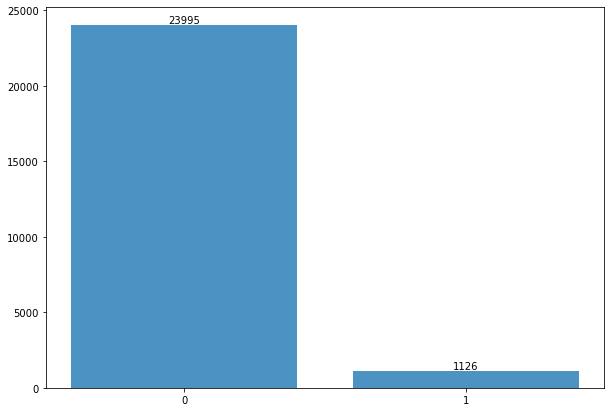

In [5]:
#plot counts of the target variable
class_sep = orig_data['class'].value_counts().reset_index()
#barplot with matplotlib
fig, ax = plt.subplots()
fig.set_size_inches([10,7])
p1 = ax.bar(class_sep['index'],class_sep['class'],alpha=0.8)
ax.set_xticks(class_sep['index'])
ax.bar_label(p1)
plt.show()

We see that our data are very imbalanced. Remember for our binary variable of interest, class, 1 = true and 0 = false. That's why we will evaluate **f1 score** and **not** accuracy.

In [6]:
#Get an exact percentage of bankrupted and not bankruppted companies
orig_data['class'].value_counts(normalize = True)

0    0.955177
1    0.044823
Name: class, dtype: float64

## 2. **Splitting data**
Let's split our labels and features so we can get to build the model! The last column is our target label `class`. The rest are features. However, we will remove the `id` column from the features as it has not predictive power.

In [7]:
#generally, we have to first separate our data in features and labels
X, y = orig_data.iloc[:,1:66], orig_data.iloc[:,66]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 123)

## 3. **Building our XGBoost model**
For this exercise, we will use the XGBoost algorithm. XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for **regression, classification and ranking problems**. Gradient boosting sequentially trains weak learners where each weak learner tries to correct its predecessor's mistakes.

### 3.1 **<u> Hyperparameter tuning with Grid Search </u>**
In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned. A methodology for choosing the right hyperparameters consists <b> Grid Search </b>. <mark> <u> Grid search </u> </mark>  is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on a the specific parameter values of a model. The model is also known as an estimator. Let's find out the hyperparameters of XGBoost!

In [8]:
# Instantiate a XGBClassifier 
xgb_clf=xgb.XGBClassifier(random_state = 123)

# Inspect the parameters
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

We chose to tune some of them. For this imbalanced problem, there are two very important hyperparateres that have to be tuned (<b> scale_pos_weight </b> and <b> min_child_weight </b>). 
- <i> scale_pos_weight </i>: The <mark> scale_pos_weight </mark> value is used to scale the gradient for the positive class. This has the effect of scaling errors made by the model during training on the positive class and encourages the model to over-correct them.
- <i> min_child_weight </i>: The <mark> min_child_weight </mark> parameter in xgboost is given as the: minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning.

<b> After doing </b> Grid Search, we came up with the following best hyperparameters for our model.

### 3.2 **<u> Instantiating our model after Grid Search </u>**

In [9]:
#defining our model
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
xgb_param_grid = {"n_estimators":[800],"max_depth":[5],"learning_rate":[0.30],"min_child_weight":[7],
                'alpha':[0.01],'scale_pos_weight':[10],'colsample_bytree':[1]}
xgb = XGBClassifier(objective = "binary:logistic", eval_metric = "auc", use_label_encoder = False, random_state = 123)
cv_f = StratifiedKFold(n_splits = 3, shuffle=True)
rand_search = GridSearchCV(estimator = xgb, param_grid = xgb_param_grid, n_jobs = 2, cv = cv_f, verbose = 1, scoring = 'f1')
rand_search.fit(X_train, y_train)
preds = rand_search.predict(X_test)
print(f1_score(y_test, preds))
print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
0.7272727272727274
0.9789040732386891
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7192
           1       0.89      0.61      0.73       345

    accuracy                           0.98      7537
   macro avg       0.94      0.81      0.86      7537
weighted avg       0.98      0.98      0.98      7537

[[7166   26]
 [ 133  212]]


In [10]:
## defining the best threshold
preds2 = (rand_search.predict_proba(X_test)[:,1] >= 0.233).astype(int)
print(f1_score(y_test, preds2))
print(classification_report(y_test, preds2))
print(confusion_matrix(y_test, preds2))

0.7523510971786834
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7192
           1       0.82      0.70      0.75       345

    accuracy                           0.98      7537
   macro avg       0.90      0.84      0.87      7537
weighted avg       0.98      0.98      0.98      7537

[[7139   53]
 [ 105  240]]


We see that the best threshold for our model is <b> 0.233 </b> with <b> 0.7523 </b> f1 score! All the hyperparameter tuning process was done in order to maximize as best as we can the f1 score given the fact that our data are very imbalanced. Now let's build some graphs!

#### 3.2.1 **Confusion matrix**

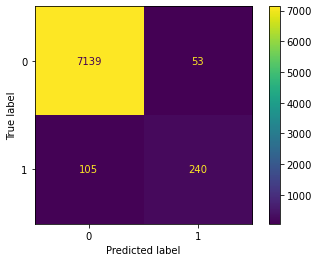

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, preds2, labels = rand_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rand_search.classes_)
disp.plot()
plt.show()

Our test dataset has 7.537 values. 53 of them are incorectly classified as positives while they are negatives (<b> FP </b>) and 105 of them are classified as negatives while they are positives (<b> FN </b>).

#### 3.2.2 **Visualizing the ROC curve**


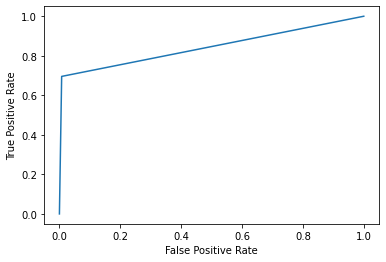

In [12]:
#now lets visualize our roc curve
from sklearn import metrics

#define metrics
preds2 = (rand_search.predict_proba(X_test)[:,1] >= 0.233).astype(int)
fpr, tpr, _ = metrics.roc_curve(y_test,  preds2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 3.2.3 **Visualizing the AUC curve**


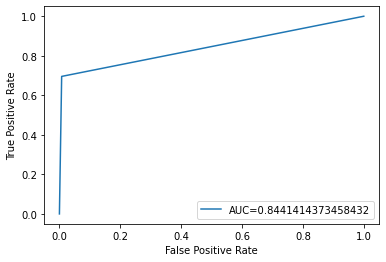

In [17]:
#define metrics
preds2 = (rand_search.predict_proba(X_test)[:,1] >= 0.233).astype(int)
fpr, tpr, _ = metrics.roc_curve(y_test,  preds2)
auc = metrics.roc_auc_score(y_test, preds2)

#create ROC curve
plt.plot(fpr,tpr,label="AUC=" + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

#### 3.2.4 **Plotting feature importance: Weight**

In order to plot the feature importance we had to instantiate again our model. Grid search created a data structure that was not accessible by the plot_importance function. So for the sake of creating this diagram a brief illustration of the model was created. This importance was calculated by using the <b> weight </b> which is the number of times a feature appears in a tree.

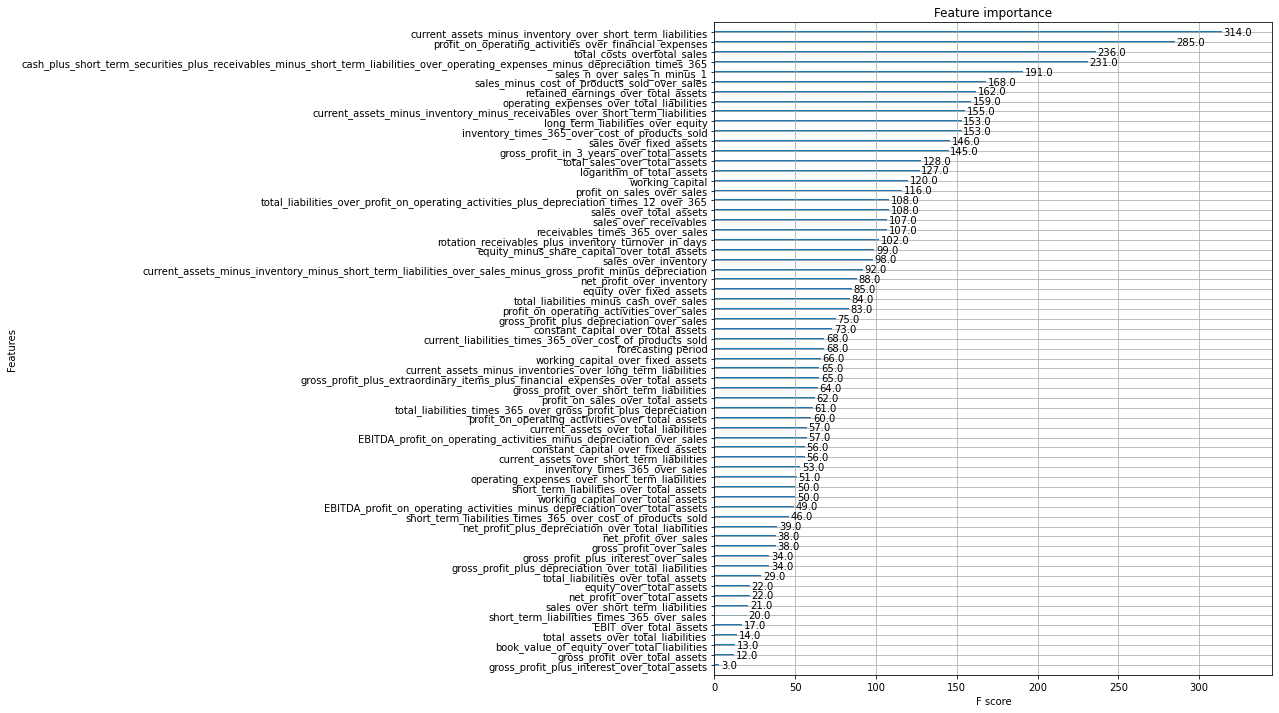

In [23]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt
xgb_clf = XGBClassifier(objective = "binary:logistic", eval_metric = "auc", random_state = 123, n_estimators = 800, max_depth = 5,
                          learning_rate = 0.3, alpha = 0.01, scale_pos_weight = 10, 
                          colsample_bytree = 1, min_child_weight = 7, use_label_encoder = False)
xgb_clf.fit(X_train, y_train)

plt.rcParams['figure.figsize'] = (10, 15)
# Plot feature importance
plot_importance(xgb_clf)
plt.show()

#### 3.2.5 **Plotting feature importance: Gain**

No we will create a feature importance plot based on <b> gain </b> (the average gain of splits which use the feature).

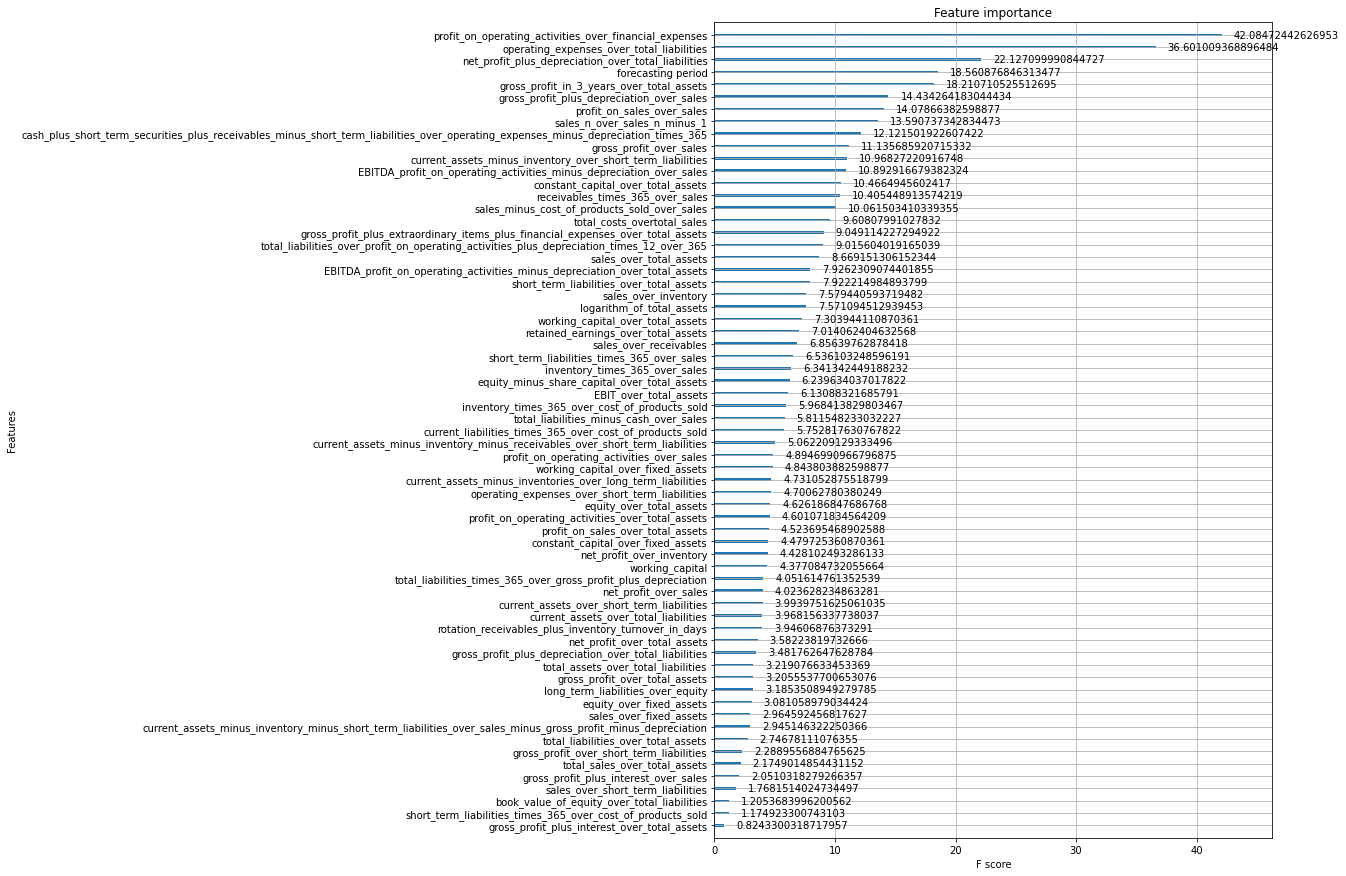

In [24]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt
xgb_clf=XGBClassifier(objective="binary:logistic", eval_metric = "auc",random_state = 123, n_estimators=800, max_depth=5,
                          learning_rate=0.3, alpha=0.01, scale_pos_weight=10,
                          colsample_bytree=1, min_child_weight=7, use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

plt.rcParams['figure.figsize'] = (10, 15)

# Plot feature importance
plot_importance(xgb_clf, importance_type="gain")
plt.show()

Here we see the ordering of features differs quite a bit between gain and weight! This implies that (1) feature importance can be subjective, and (2) the number of appearances a feature has on a tree is not necessarily correlated to how much gain it brings.

## 4. **Conclusion**

The problem was to predict which companies would go bankrupt. It was a binary classification problem. Given that the data were quite imbalanced, the XGBoost algorithm was chosen to be applied. XGBoost is currently one of the most widely used Machine Learning algorithms for both classification and regression problems. Moreover, this algorithm has the hyperparameters scale_pos_weight and min_child_weight which are extremely useful when the data are imbalanced.

After the hyperparameter tuning process, the model that was built gave accuracy 97,90% and f1-score 75,23%. It is very important to keep in mind that our goal is to maximize as best as we can the f1-score ase we are talking about an imbalanced dataset and accuracy might me misleading.

Furthermore, by looking the diagram of feature importance based on weight it is clearly understood that the variables current assets minus inventory over short term liabilities, profit on operating activities over financial expenses and total costs over total sales are the top three appearing many times in the trees.

On the other hand, the diagram of feature importance based on gain gives us another captivating information. It depicts that profit on operating activities over financial expenses, operating expenses over total liabilities and net profit plus depreciation over total liabilities are the top three features that bring the most improvement in accuracy to the branches they are on.